In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [36]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [38]:
import pickle

In [5]:
tensorflow.__version__

'2.10.0'

In [6]:
df = pd.read_csv('dataset.csv')

In [7]:
df.head()

,NPI,State,Login Time,Logout Time,Usage Time (mins),Region,Speciality,Count of Survey Attempts
0,1000000000,NY,2025-03-08 06:09:00,2025-03-08 06:28:00,19,Northeast,Cardiology,3
1,1000000001,MI,2025-03-08 12:28:00,2025-03-08 13:10:00,42,Midwest,Oncology,5
2,1000000002,CA,2025-03-08 15:11:00,2025-03-08 15:37:00,26,West,Oncology,8
3,1000000003,TX,2025-03-08 14:17:00,2025-03-08 15:36:00,79,Northeast,Orthopedics,9
4,1000000004,GA,2025-03-08 15:59:00,2025-03-08 17:37:00,98,West,Oncology,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NPI                       1000 non-null   int64 
 1   State                     1000 non-null   object
 2   Login Time                1000 non-null   object
 3   Logout Time               1000 non-null   object
 4   Usage Time (mins)         1000 non-null   int64 
 5   Region                    1000 non-null   object
 6   Speciality                1000 non-null   object
 7   Count of Survey Attempts  1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<Axes: xlabel='Region', ylabel='Count of Survey Attempts'>

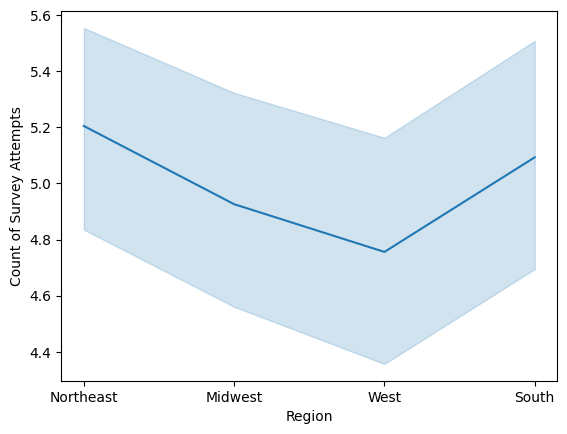

In [9]:
sns.lineplot(x='Region', y='Count of Survey Attempts', data=df)

<Axes: xlabel='State', ylabel='Count of Survey Attempts'>

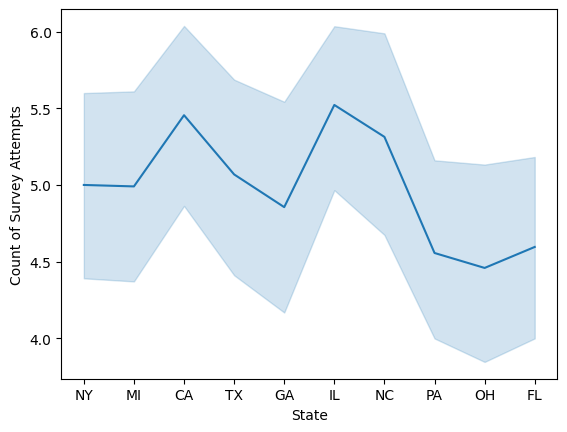

In [10]:
sns.lineplot(x='State', y='Count of Survey Attempts', data=df)

#### data has no outliers

In [11]:
df['Count of Survey Attempts'].dtype

dtype('int64')

In [12]:
df['Login Hour'] = pd.to_datetime(df['Login Time']).dt.hour

In [13]:
df['Logout Hour'] = pd.to_datetime(df['Logout Time']).dt.hour

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   NPI                       1000 non-null   int64 
 1   State                     1000 non-null   object
 2   Login Time                1000 non-null   object
 3   Logout Time               1000 non-null   object
 4   Usage Time (mins)         1000 non-null   int64 
 5   Region                    1000 non-null   object
 6   Speciality                1000 non-null   object
 7   Count of Survey Attempts  1000 non-null   int64 
 8   Login Hour                1000 non-null   int32 
 9   Logout Hour               1000 non-null   int32 
dtypes: int32(2), int64(3), object(5)
memory usage: 70.4+ KB


In [15]:
features = ['State', 'Speciality', 'Region', 'Login Hour', 'Logout Hour', 'Usage Time (mins)', 'Count of Survey Attempts']
target = (df['Count of Survey Attempts'] > 0).astype(int)

In [16]:
X = df[features]
y = target

# Encoding 

In [17]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [18]:
encoded_features = encoder.fit_transform(X[['State', 'Region', 'Speciality']])

In [19]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['State', 'Region', 'Speciality']))

In [20]:
encoded_df

,State_FL,State_GA,State_IL,State_MI,State_NC,State_NY,State_OH,State_PA,State_TX,Region_Northeast,Region_South,Region_West,Speciality_General Practice,Speciality_Neurology,Speciality_Oncology,Speciality_Orthopedics,Speciality_Pediatrics,Speciality_Radiology
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [21]:
X_df = pd.concat([encoded_df, X[['Login Hour', 'Logout Hour', 'Usage Time (mins)', 'Count of Survey Attempts']]], axis=1)

In [22]:
X_df

,State_FL,State_GA,State_IL,State_MI,State_NC,State_NY,State_OH,State_PA,State_TX,Region_Northeast,...,Speciality_General Practice,Speciality_Neurology,Speciality_Oncology,Speciality_Orthopedics,Speciality_Pediatrics,Speciality_Radiology,Login Hour,Logout Hour,Usage Time (mins),Count of Survey Attempts
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6,6,19,3
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,12,13,42,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,15,15,26,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,14,15,79,9
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,15,17,98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,11,12,60,0
996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,17,17,43,8
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18,19,62,1
998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,17,19,103,6


# Scaler

In [23]:
scaler = StandardScaler()

In [24]:
X_scaled = scaler.fit_transform(X_df)

In [25]:
X_scaled.shape

(1000, 22)

In [26]:
X_scaled

array([[-0.33147838, -0.30085302, -0.36400938, ..., -1.79304362,
        -1.36890732, -0.63448459],
       [-0.33147838, -0.30085302, -0.36400938, ..., -0.20908282,
        -0.67775246,  0.00286809],
       [-0.33147838, -0.30085302, -0.36400938, ...,  0.2434774 ,
        -1.15855584,  0.9588971 ],
       ...,
       [-0.33147838, -0.30085302, -0.36400938, ...,  1.14859786,
        -0.07674824, -1.27183726],
       [-0.33147838, -0.30085302, -0.36400938, ...,  1.14859786,
         1.15531042,  0.32154442],
       [-0.33147838, -0.30085302, -0.36400938, ...,  0.01719729,
        -0.34720014, -0.95316093]])

# Training and Spliting

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(800, 22)

In [29]:
y_train.shape

(800,)

# Model Training

In [30]:
model = Sequential()

In [31]:
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=2,
)

Epoch 1/200
13/13 - 4s - loss: 1.1874 - accuracy: 0.3013 - val_loss: 0.7389 - val_accuracy: 0.1100 - 4s/epoch - 305ms/step
Epoch 2/200
13/13 - 0s - loss: 1.1724 - accuracy: 0.3262 - val_loss: 0.8038 - val_accuracy: 0.1050 - 304ms/epoch - 23ms/step
Epoch 3/200
13/13 - 0s - loss: 1.1369 - accuracy: 0.3300 - val_loss: 0.8565 - val_accuracy: 0.1050 - 398ms/epoch - 31ms/step
Epoch 4/200
13/13 - 0s - loss: 1.1120 - accuracy: 0.3212 - val_loss: 0.8940 - val_accuracy: 0.1050 - 276ms/epoch - 21ms/step
Epoch 5/200
13/13 - 0s - loss: 1.1034 - accuracy: 0.3187 - val_loss: 0.9233 - val_accuracy: 0.1050 - 421ms/epoch - 32ms/step
Epoch 6/200
13/13 - 0s - loss: 1.0638 - accuracy: 0.3762 - val_loss: 0.9452 - val_accuracy: 0.1050 - 327ms/epoch - 25ms/step
Epoch 7/200
13/13 - 0s - loss: 1.0338 - accuracy: 0.3700 - val_loss: 0.9560 - val_accuracy: 0.1050 - 279ms/epoch - 21ms/step
Epoch 8/200
13/13 - 0s - loss: 0.9997 - accuracy: 0.4025 - val_loss: 0.9626 - val_accuracy: 0.1050 - 278ms/epoch - 21ms/step
Ep

# Analysing Predicting Data 

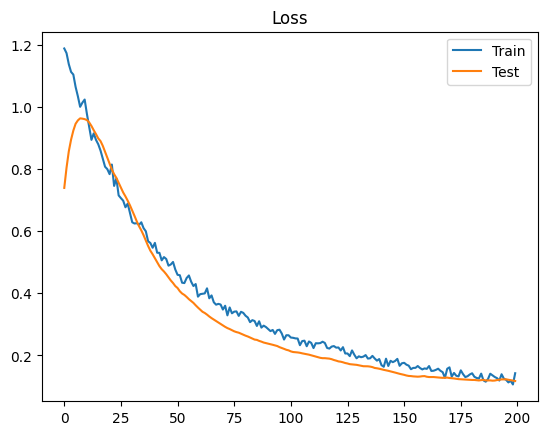

In [34]:
plt.title('Loss')
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

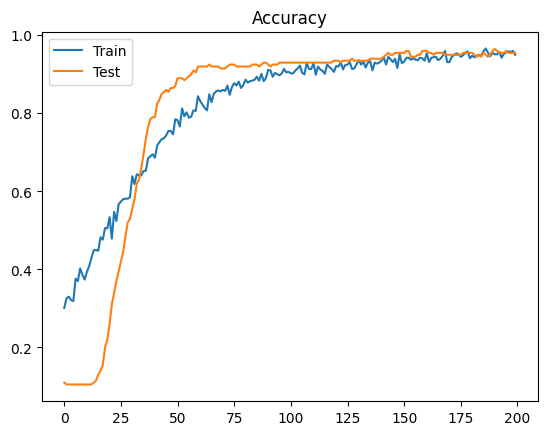

In [35]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.show()

# Saving Model

In [39]:
model.save('model.h5')

In [40]:
pickle.dump(encoder, open('encoder.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))